In [8]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [2]:
covid_df = pd.read_excel('COVID-19.xlsx')

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
india_df = covid_df.loc[covid_df['countriesAndTerritories'] == 'India']

In [29]:
india_df = india_df.sort_values(by="dateRep")

In [30]:
india_df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
7851,2019-12-31,31,12,2019,0,0,India,IN,IND,1.352617e+09,Asia
7850,2020-01-01,1,1,2020,0,0,India,IN,IND,1.352617e+09,Asia
7849,2020-01-02,2,1,2020,0,0,India,IN,IND,1.352617e+09,Asia
7848,2020-01-03,3,1,2020,0,0,India,IN,IND,1.352617e+09,Asia
7847,2020-01-04,4,1,2020,0,0,India,IN,IND,1.352617e+09,Asia
...,...,...,...,...,...,...,...,...,...,...,...
7716,2020-05-15,15,5,2020,3967,100,India,IN,IND,1.352617e+09,Asia
7715,2020-05-16,16,5,2020,3970,103,India,IN,IND,1.352617e+09,Asia
7714,2020-05-17,17,5,2020,4987,120,India,IN,IND,1.352617e+09,Asia
7713,2020-05-18,18,5,2020,5242,157,India,IN,IND,1.352617e+09,Asia


In [257]:
daily_cases = india_df[['dateRep']].copy()
daily_cases['New Cases'] = india_df['cases']
daily_cases

,dateRep,New Cases
7851,2019-12-31,0
7850,2020-01-01,0
7849,2020-01-02,0
7848,2020-01-03,0
7847,2020-01-04,0
7846,2020-01-05,0
7845,2020-01-06,0
7844,2020-01-07,0
7843,2020-01-08,0
7842,2020-01-09,0


In [258]:
daily_cases.index = pd.to_datetime(daily_cases.dateRep)
daily_cases = daily_cases.drop(columns = 'dateRep')

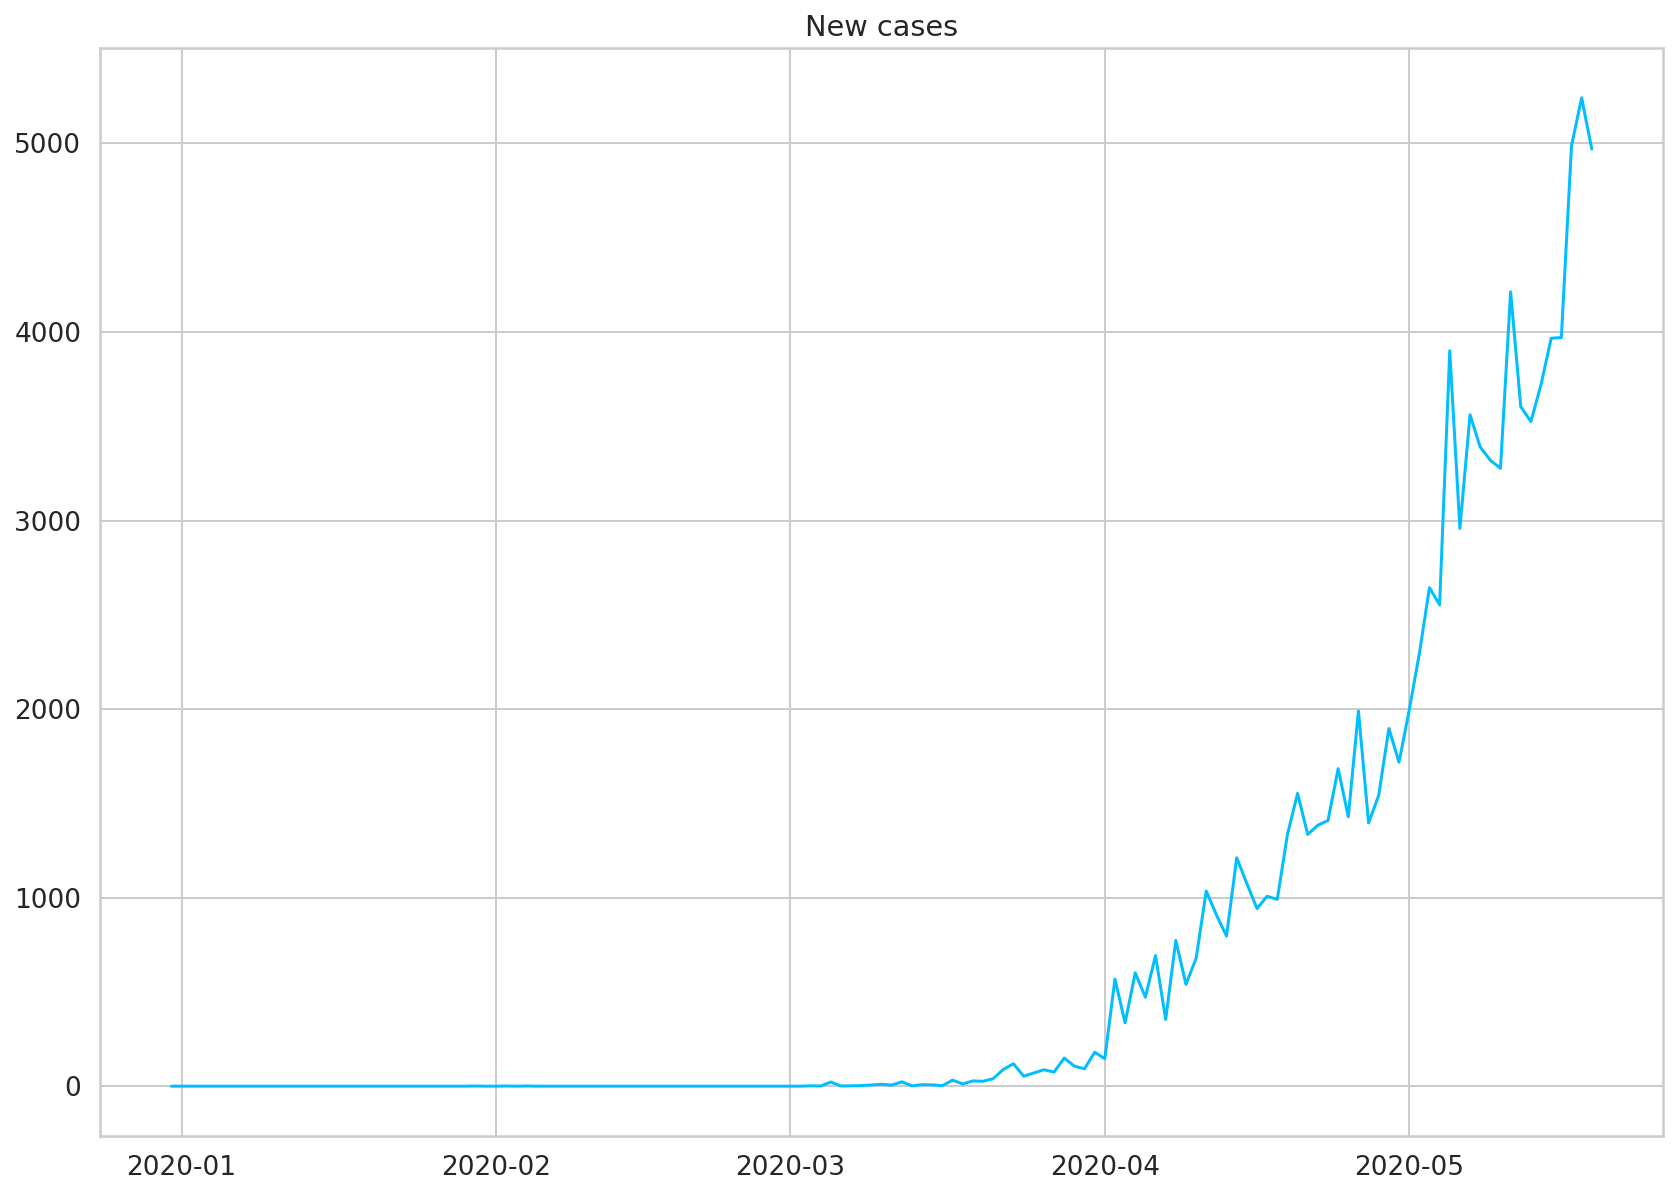

In [259]:
plt.plot(daily_cases)
plt.title("New cases");

In [35]:
cases = []
c =0
for case in india_df['cases']:
    c +=case
    cases.append(c)
cumu_cases = india_df[['dateRep']].copy()
cumu_cases['Total Cases'] = cases

,dateRep,Total Cases
7851,2019-12-31,0
7850,2020-01-01,0
7849,2020-01-02,0
7848,2020-01-03,0
7847,2020-01-04,0
...,...,...
7716,2020-05-15,81970
7715,2020-05-16,85940
7714,2020-05-17,90927
7713,2020-05-18,96169


In [37]:
cumu_cases.index = pd.to_datetime(cumu_cases.dateRep)
cumu_cases = cumu_cases.drop(columns = 'dateRep')
cumu_cases

,Total Cases
dateRep,
2019-12-31,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
...,...
2020-05-15,81970
2020-05-16,85940
2020-05-17,90927


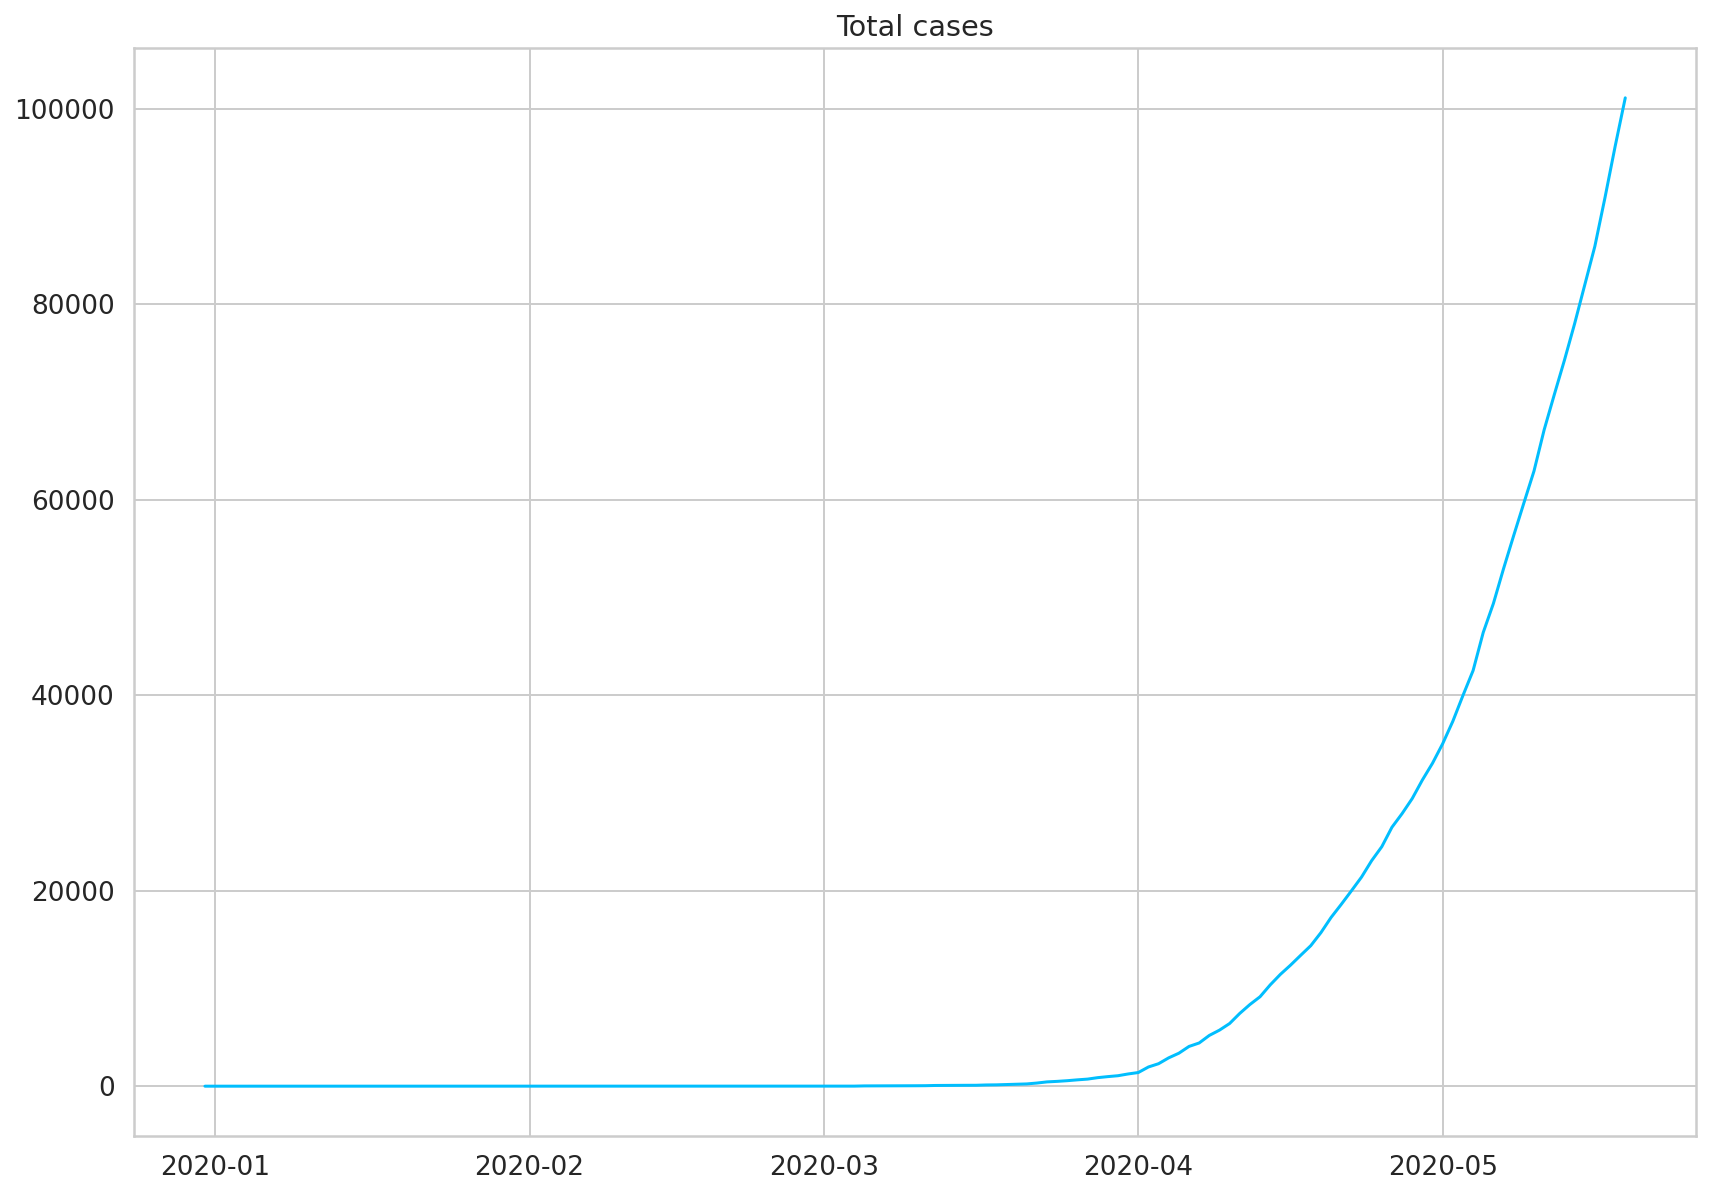

In [335]:
plt.plot(cumu_cases)
plt.title("Total cases");

# Training and testing data - to check the performance of the model

# Splitting data into training and testing sets

In [129]:
test_data_size = 10

train_data = daily_cases[20:-test_data_size]
test_data = daily_cases[-test_data_size:]

print("train data shape = "+str(train_data.shape))
print("test data shape = "+str(test_data.shape))

train data shape = (110, 1)
test data shape = (10, 1)


## Scaling the data using min_max_scaler for better performance on model

In [67]:
scaler = MinMaxScaler()

scaler = scaler.fit(train_data)

train_data = scaler.transform(train_data)

test_data = scaler.transform(test_data)

In [68]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [69]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [70]:
X_train.shape

torch.Size([104, 5, 1])

In [71]:
X_train[50:]

tensor([[[1.5385e-03],
         [5.8974e-03],
         [5.1282e-04],
         [2.0513e-03],
         [1.7949e-03]],

        [[5.8974e-03],
         [5.1282e-04],
         [2.0513e-03],
         [1.7949e-03],
         [7.6923e-04]],

        [[5.1282e-04],
         [2.0513e-03],
         [1.7949e-03],
         [7.6923e-04],
         [8.2051e-03]],

        [[2.0513e-03],
         [1.7949e-03],
         [7.6923e-04],
         [8.2051e-03],
         [3.0769e-03]],

        [[1.7949e-03],
         [7.6923e-04],
         [8.2051e-03],
         [3.0769e-03],
         [7.1795e-03]],

        [[7.6923e-04],
         [8.2051e-03],
         [3.0769e-03],
         [7.1795e-03],
         [6.6667e-03]],

        [[8.2051e-03],
         [3.0769e-03],
         [7.1795e-03],
         [6.6667e-03],
         [1.0256e-02]],

        [[3.0769e-03],
         [7.1795e-03],
         [6.6667e-03],
         [1.0256e-02],
         [2.2821e-02]],

        [[7.1795e-03],
         [6.6667e-03],
         [1.0256e-

In [72]:
y_train.shape

torch.Size([104, 1])

## Model

In [74]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

Constructor - initialize all helper data and create the layers
reset_hidden_state - we'll use a stateless LSTM, so we need to reset the state after each example
forward - get the sequences, pass all of them through the LSTM layer, at once. We take the output of the last time step and pass it through our linear layer to get the prediction.

In [78]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

In [79]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 7.9195661544799805 test loss: 5.682305812835693
Epoch 10 train loss: 4.7623372077941895 test loss: 3.7343809604644775
Epoch 20 train loss: 3.095134973526001 test loss: 0.2030998021364212
Epoch 30 train loss: 5.52214241027832 test loss: 4.33317756652832
Epoch 40 train loss: 5.120054721832275 test loss: 3.8468384742736816
Epoch 50 train loss: 4.787853240966797 test loss: 3.863147258758545
Epoch 60 train loss: 2.4374053478240967 test loss: 1.5428791046142578
Epoch 70 train loss: 2.8235528469085693 test loss: 1.5924267768859863
Epoch 80 train loss: 1.7984586954116821 test loss: 0.02844998612999916
Epoch 90 train loss: 1.3573400974273682 test loss: 1.8744277954101562


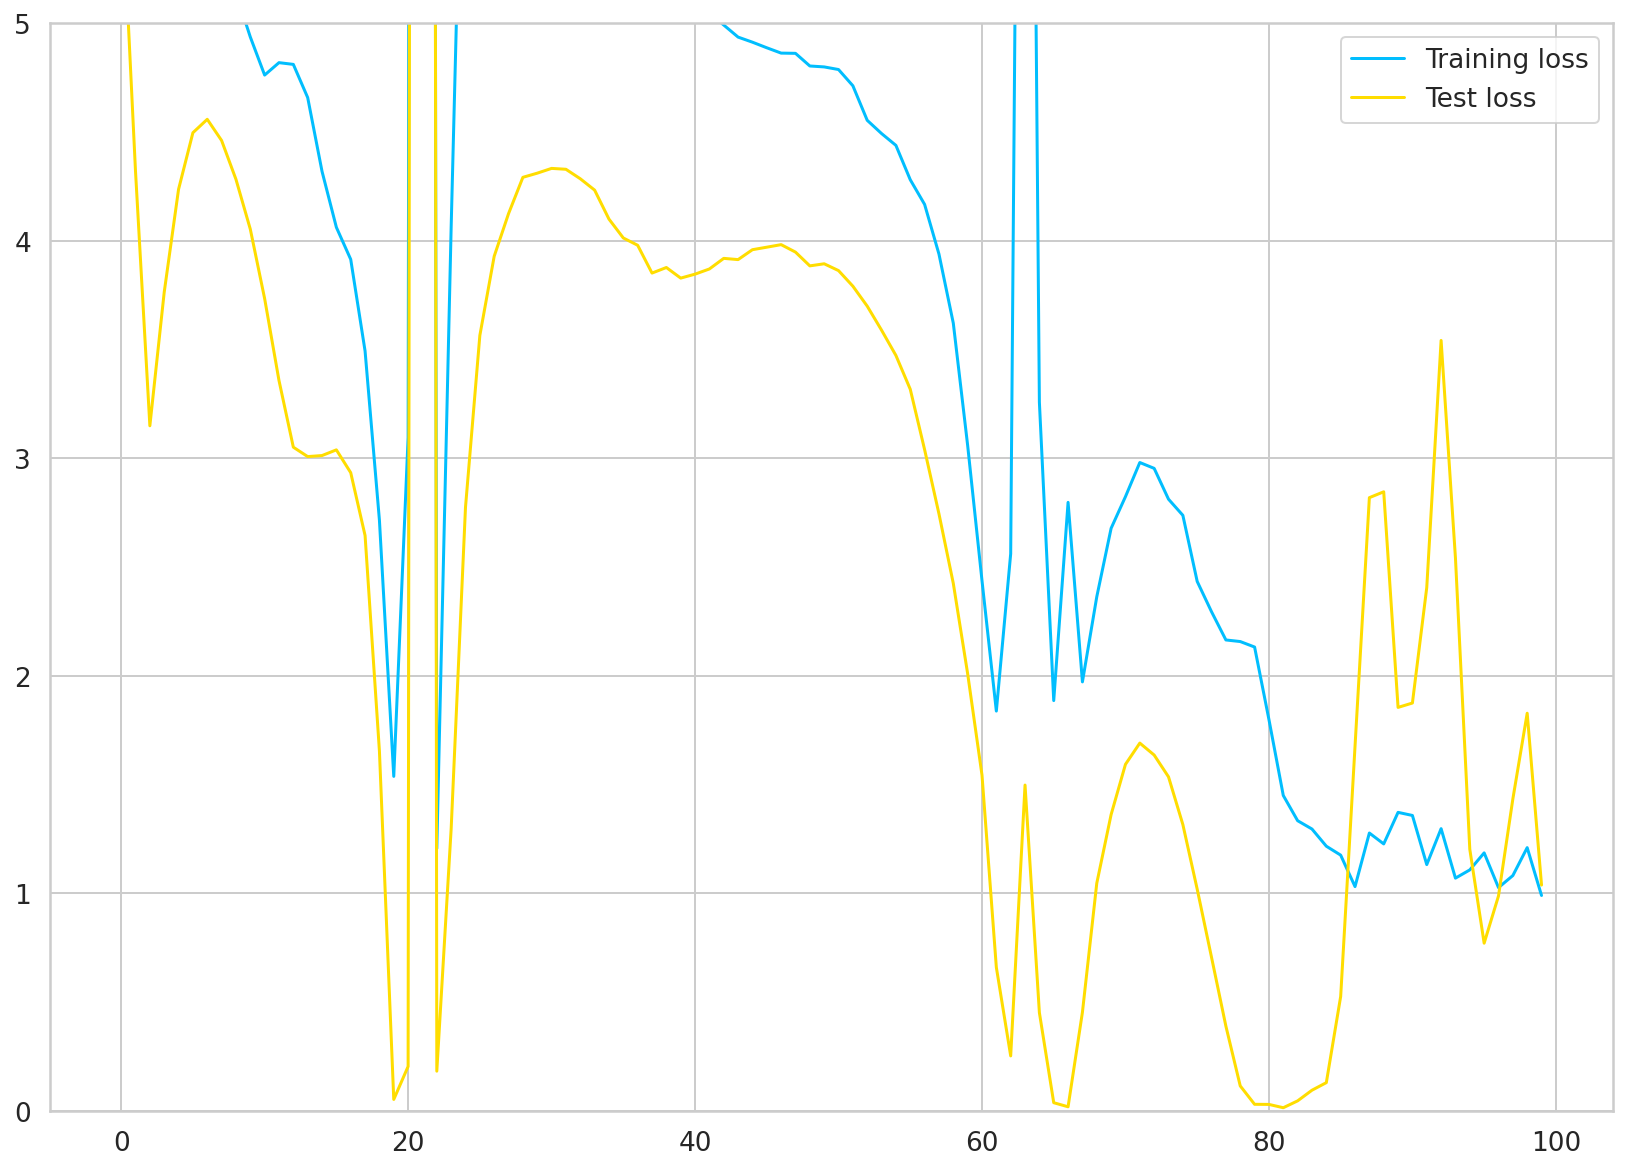

In [80]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

### model can (due to the way we've trained it) predict only a single day in the future. We'll employ a simple strategy to overcome this limitation. Use predicted values as input for predicting the next days:

In [81]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [82]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

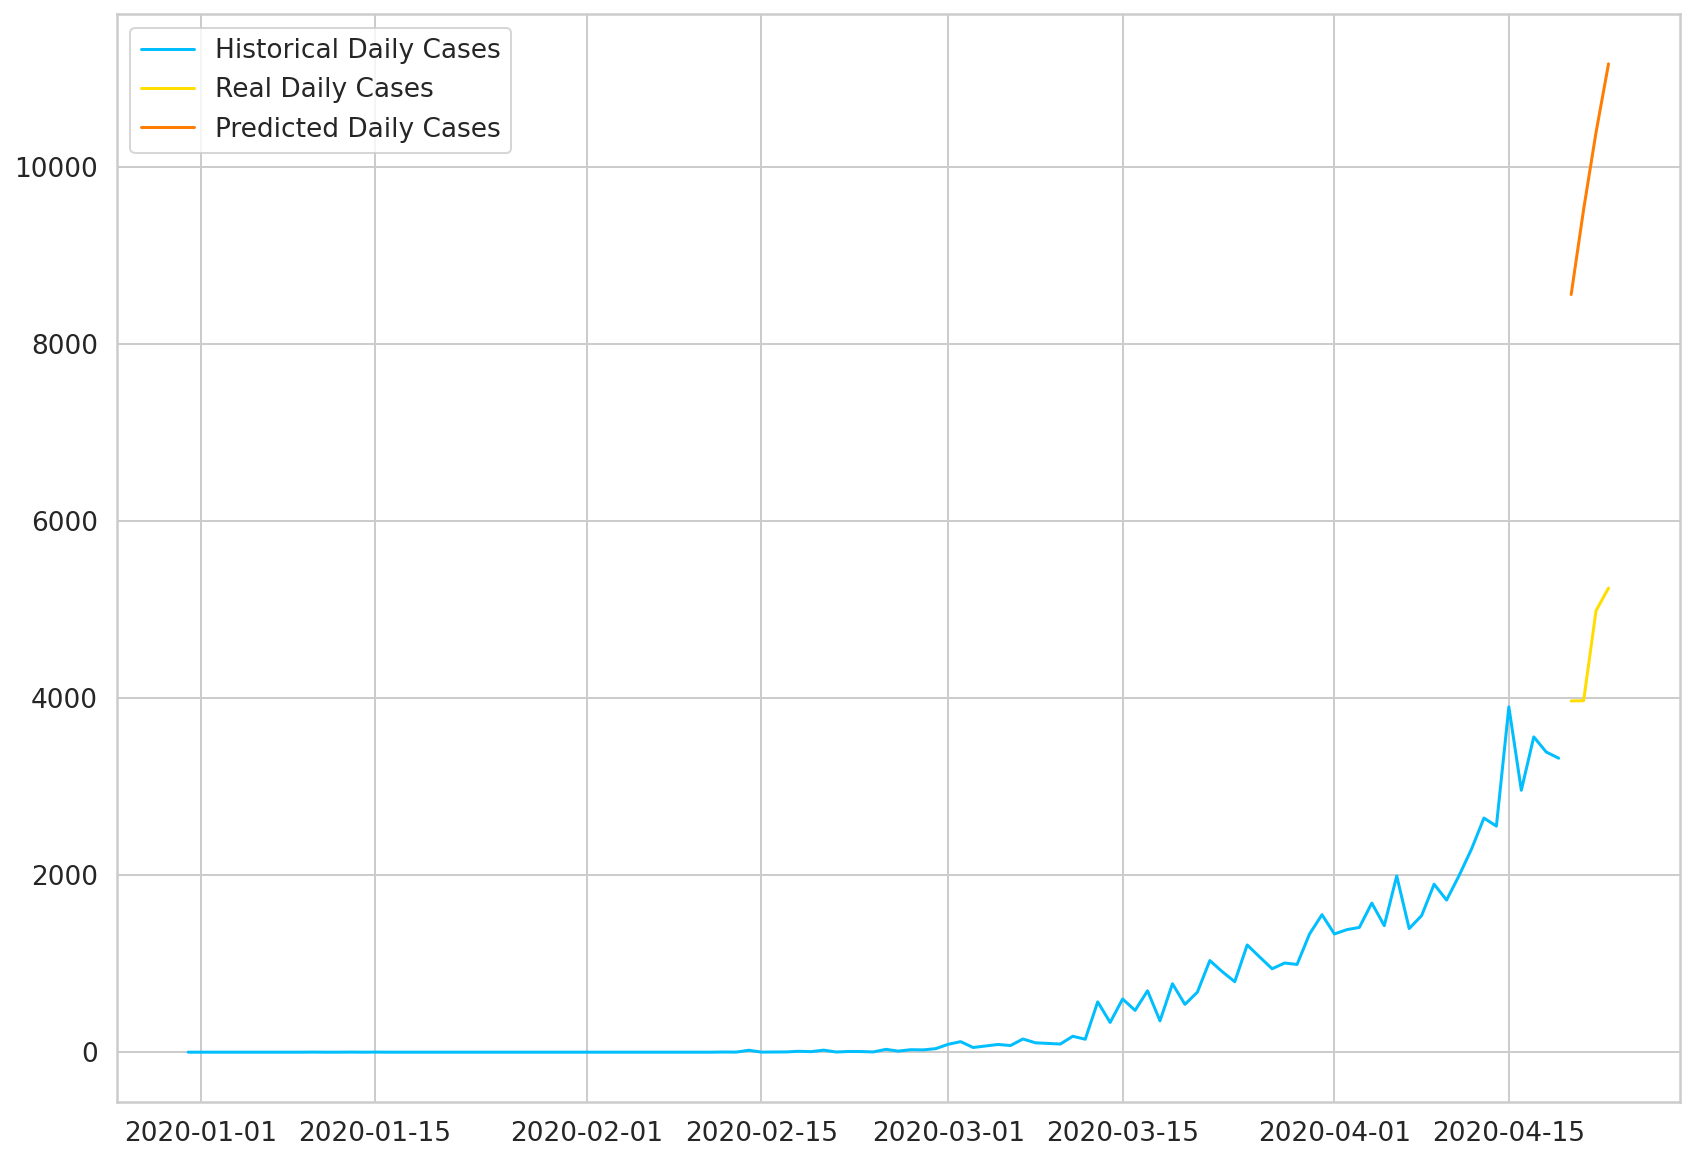

In [83]:
plt.plot(
  daily_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

# we will nonw use all the data for training the same model

In [260]:
store = daily_cases
daily_cases = daily_cases.iloc[-10:,:]
daily_cases

,New Cases
dateRep,
2020-05-10,3277
2020-05-11,4213
2020-05-12,3604
2020-05-13,3525
2020-05-14,3722
2020-05-15,3967
2020-05-16,3970
2020-05-17,4987
2020-05-18,5242


In [261]:
scaler = MinMaxScaler()

scaler = scaler.fit(daily_cases)

all_data = scaler.transform(daily_cases)

all_data.shape

(10, 1)

In [262]:
all_data

array([[0.        ],
       [0.47633588],
       [0.16641221],
       [0.12620865],
       [0.2264631 ],
       [0.35114504],
       [0.35267176],
       [0.87022901],
       [1.        ],
       [0.86157761]])

In [263]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

In [264]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 6.660826683044434
Epoch 10 train loss: 4.133607864379883
Epoch 20 train loss: 3.6053378582000732
Epoch 30 train loss: 3.594648838043213
Epoch 40 train loss: 2.046274423599243
Epoch 50 train loss: 1.8050813674926758
Epoch 60 train loss: 1.1482983827590942
Epoch 70 train loss: 1.0430086851119995
Epoch 80 train loss: 1.0791834592819214
Epoch 90 train loss: 1.1288281679153442


In [329]:
DAYS_TO_PREDICT = 10

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [330]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [331]:
daily_cases.index[-1]

Timestamp('2020-05-19 00:00:00')

In [ ]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [333]:
predicted_cases

2020-05-20    760216.366150
2020-05-21    760053.137077
2020-05-22    760667.377556
2020-05-23    761108.577118
2020-05-24    761425.890244
2020-05-25    761649.276398
2020-05-26    761809.409500
2020-05-27    761925.675087
2020-05-28    762010.980972
2020-05-29    762074.043503
Freq: D, dtype: float64

In [ ]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();